In [1]:
push!(LOAD_PATH, "/home/zhenan/Github/AtomicOpt.jl")
using AtomicOpt
using Plots
using Images
using LinearAlgebra
using SparseArrays

## Load Data

In [2]:
xs = Vector{Float64}()
xr = Vector{Float64}()
b = Vector{Float64}()
m = 0
n = 0
ks = 0
kr = 0
lines = readlines("./ChessBoardData.txt", keep=true)
for line in lines
    info = split(line)
    if length(info) ≥ 1
        if info[1] == "xs"
            for s in info[3:end]
                push!(xs, parse(Float64, s))
            end
        elseif info[1] == "xr"
            for s in info[3:end]
                push!(xr, parse(Float64, s))
            end
        elseif info[1] == "b"
            for s in info[3:end]
                push!(b, parse(Float64, s))
            end
        elseif info[1] == "ks"
            ks = parse(Int64, info[3])
        elseif info[1] == "kr"
            kr = parse(Int64, info[3])
        elseif info[1] == "m"
            m = parse(Int64, info[3])
        elseif info[1] == "n"
            n = parse(Int64, info[3])
        end
    end
end

## Plot observation

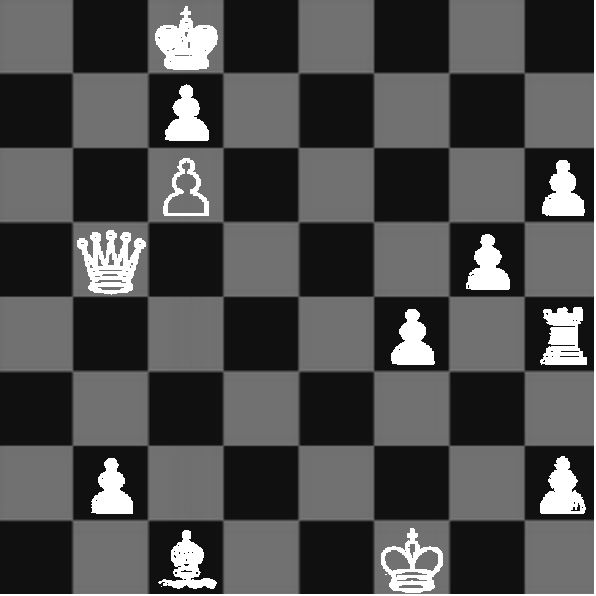

In [3]:
colorview(Gray, reshape(b, m, n))

## Construct atomic sets

In [4]:
As = OneBall(n*m; maxrank = ks); As = gauge(As, xs)*As
Ar = NucBall(n, m; maxrank = kr); Ar = gauge(Ar, xr)*Ar
A = As + Ar

atomic set  : Sum of atomic sets
description : A₁ + A₂ + ⋯
parameters  : 2 sets; n = 355216

## Solve demixing problem

In [5]:
sol = level_set(I(n*m), b, A, tol=1e-2, maxIts=10000) 


  -------------------------------------------------------------------------
  Polar Level Set Method
  -------------------------------------------------------------------------
  number of variables     355216         number of constraints  355216
  feasibility tolerance  4.60e+00         α                    0.00e+00
  max iterations           10000 
  -------------------------------------------------------------------------
  Major      Minor        u-α        ℓ-α        gap          τ         infeas-α  Subproblem
      1          1   2.27e+08   2.27e+08   1.05e+05   3.74e-01       1.05e+05   suboptimal
      2        219   2.54e+04   2.80e+01   2.54e+04   5.59e-01       1.05e+05   suboptimal
      3          1   2.53e+04   3.91e+02   2.50e+04   5.60e-01       1.05e+05   suboptimal
      4          2   2.51e+04   2.87e+02   2.48e+04   5.63e-01       1.05e+05   suboptimal
      5          1   2.48e+04   1.03e+02   2.47e+04   5.65e-01       1.05e+05   suboptimal
      6          1   2

     86          2   9.93e+03   9.01e+01   9.84e+03   7.26e-01       1.05e+05   suboptimal
     87          2   9.83e+03   9.26e+01   9.73e+03   7.27e-01       1.05e+05   suboptimal
     88          2   9.72e+03   1.58e+02   9.57e+03   7.29e-01       1.05e+05   suboptimal
     89          2   9.57e+03   1.39e+02   9.43e+03   7.31e-01       1.05e+05   suboptimal
     90          2   9.43e+03   3.52e+01   9.40e+03   7.33e-01       1.05e+05   suboptimal
     91          1   9.39e+03   9.68e+01   9.29e+03   7.34e-01       1.05e+05   suboptimal
     92          1   9.30e+03   7.74e+01   9.22e+03   7.35e-01       1.05e+05   suboptimal
     93          1   9.22e+03   9.00e+01   9.13e+03   7.36e-01       1.05e+05   suboptimal
     94          1   9.14e+03   8.03e+01   9.06e+03   7.38e-01       1.05e+05   suboptimal
     95          1   9.06e+03   1.27e+02   8.94e+03   7.39e-01       1.05e+05   suboptimal
     96          1   8.95e+03   1.04e+02   8.84e+03   7.41e-01       1.05e+05   suboptimal

    177          1   4.23e+03   1.19e+01   4.22e+03   8.15e-01       1.05e+05   suboptimal
    178          1   4.21e+03   1.29e+01   4.20e+03   8.15e-01       1.05e+05   suboptimal
    179          2   4.19e+03   1.47e+01   4.18e+03   8.15e-01       1.05e+05   suboptimal
    180          4   4.17e+03   4.55e+01   4.13e+03   8.16e-01       1.05e+05   suboptimal
    181          2   4.13e+03   2.50e+01   4.10e+03   8.17e-01       1.05e+05   suboptimal
    182          2   4.10e+03   4.89e+00   4.09e+03   8.18e-01       1.05e+05   suboptimal
    183          2   4.09e+03   4.15e+01   4.05e+03   8.18e-01       1.05e+05   suboptimal
    184          4   4.04e+03   4.44e+01   4.00e+03   8.19e-01       1.05e+05   suboptimal
    185          2   4.00e+03   1.96e+01   3.98e+03   8.20e-01       1.05e+05   suboptimal
    186          2   3.97e+03   5.40e+00   3.97e+03   8.20e-01       1.05e+05   suboptimal
    187          3   3.96e+03   3.17e+01   3.93e+03   8.20e-01       1.05e+05   suboptimal

    268          6   1.80e+03   6.17e+01   1.74e+03   8.75e-01       1.05e+05   suboptimal
    269         16   1.74e+03   1.46e+01   1.72e+03   8.78e-01       1.05e+05   suboptimal
    270          6   1.72e+03   1.61e+01   1.70e+03   8.78e-01       1.05e+05   suboptimal
    271          2   1.70e+03   1.06e+01   1.69e+03   8.79e-01       1.05e+05   suboptimal
    272         18   1.68e+03   2.09e+01   1.66e+03   8.79e-01       1.05e+05   suboptimal
    273          6   1.65e+03   1.42e+01   1.64e+03   8.80e-01       1.05e+05   suboptimal
    274          2   1.64e+03   1.51e+01   1.63e+03   8.81e-01       1.05e+05   suboptimal
    275         16   1.62e+03   7.43e+00   1.61e+03   8.81e-01       1.05e+05   suboptimal
    276          2   1.61e+03   4.28e+01   1.56e+03   8.82e-01       1.05e+05   suboptimal
    277         16   1.56e+03   6.42e+00   1.55e+03   8.83e-01       1.05e+05   suboptimal
    278          2   1.55e+03   3.42e+01   1.52e+03   8.84e-01       1.05e+05   suboptimal

    359         18   3.73e+02   1.34e+01   3.59e+02   9.39e-01       3.24e+03   suboptimal
    360        110   3.54e+02   6.36e+00   3.47e+02   9.40e-01       3.16e+03   suboptimal
    361         16   3.47e+02   7.02e+00   3.40e+02   9.41e-01       3.16e+03   suboptimal
    362          6   3.40e+02   7.99e+00   3.32e+02   9.42e-01       3.16e+03   suboptimal
    363         24   3.31e+02   8.65e+00   3.22e+02   9.42e-01       3.16e+03   suboptimal
    364         47   3.20e+02   5.58e+00   3.14e+02   9.43e-01       3.16e+03   suboptimal
    365          9   3.14e+02   8.68e+00   3.05e+02   9.44e-01       3.16e+03   suboptimal
    366        148   2.98e+02   5.58e+00   2.93e+02   9.45e-01       3.16e+03   suboptimal
    367         34   2.92e+02   7.58e+00   2.84e+02   9.45e-01       3.16e+03   suboptimal
    368          8   2.84e+02   7.31e+00   2.77e+02   9.46e-01       3.16e+03   suboptimal
    369        137   2.71e+02   4.82e+00   2.66e+02   9.47e-01       3.16e+03   suboptimal

Solution{AbstractFace, Vector{Float64}, Float64}(face of atomic set  : Face of the sum of atomic sets
parameters          : rank = (21741, 4); n = 355216, face of atomic set  : Face of the sum of atomic sets
parameters          : rank = (21741, 4); n = 355216, [2.8453855751741912e-5, 2.558251165166376e-5, 2.5139070925462566e-5, 4.267385610941935e-5, 4.2618620185793404e-5, 4.2674709391134924e-5, 4.268173984551689e-5, 4.267439573533603e-5, 4.267907018407231e-5, 4.0784525405393056e-5  …  4.6022726472348276e-5, 4.6004158731257524e-5, 4.603767529254337e-5, 4.6031917515509167e-5, 4.600667756792408e-5, 4.6027276531537853e-5, 0.589146342587369, -0.006330258600298784, -0.004595418428868573, 0.41699007061410226], [2.8453732843023882e-5, 2.5582389041563264e-5, 2.513894741072112e-5, 4.267377609592098e-5, 4.261854035577512e-5, 4.2674629379031034e-5, 4.268165983876312e-5, 4.267431572046831e-5, 4.267899018070332e-5, 4.078452281730257e-5  …  4.602269765470559e-5, 4.6004129932179066e-5, 4.6037646584080

## Plot result

In [6]:
# construct primal 
x = constructPrimal(sol);

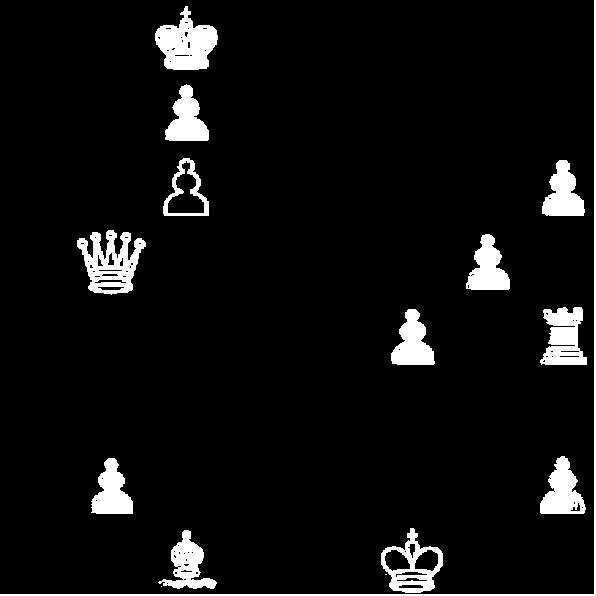

In [7]:
colorview(Gray, reshape(x[1], m, n))

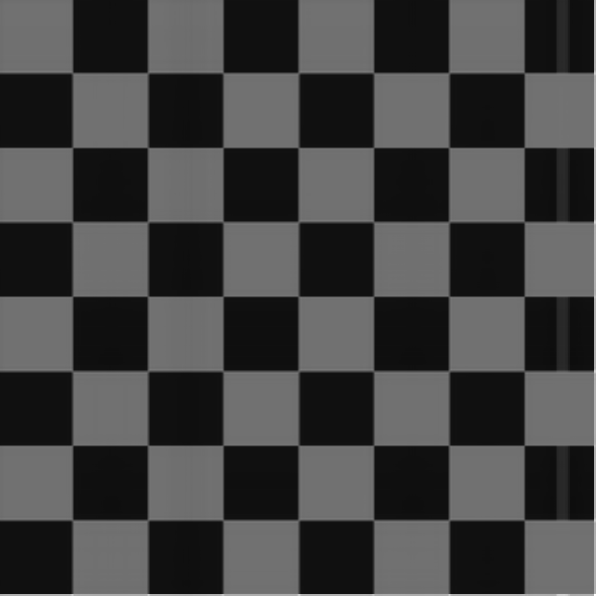

In [12]:
colorview(Gray, reshape(x[2], m, n))